In [1]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels


/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
#from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.classification import *
from sklearn.metrics import confusion_matrix



In [3]:
dta0_01 = pd.read_csv('data/raw/jan2023.csv')
dta0_02 = pd.read_csv('data/raw/fev2023.csv')
dta0_03 = pd.read_csv('data/raw/mar2023.csv')
dta0_04 = pd.read_csv('data/raw/abr2023.csv')
dta0_05 = pd.read_csv('data/raw/mai2023.csv')
dta0_06 = pd.read_csv('data/raw/jun2023.csv')
dta0_07 = pd.read_csv('data/raw/jul2023.csv')
dta0_08 = pd.read_csv('data/raw/ago2023.csv')
dta0_09 = pd.read_csv('data/raw/set2023.csv')
dta0_10 = pd.read_csv('data/raw/out2023.csv')
dta0_11 = pd.read_csv('data/raw/nov2023.csv')
data0_0 = pd.read_csv('data/raw/dez2023.csv')
data0_1 = pd.read_csv('data/raw/jan2024.csv')
data0_2 = pd.read_csv('data/raw/fev2024.csv')
data0_3 = pd.read_csv('data/raw/mar2024.csv')
data0_4 = pd.read_csv('data/raw/abr2024.csv')
data0_5 = pd.read_csv('data/raw/mai2024.csv')

feat_drop = ['Nome do fundo','CNPJ do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

feat_dropt = ['Nome do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

cpj01 = dta0_01['CNPJ do fundo'].loc[ (dta0_01['Cotistas'] > 100) & (dta0_01['Classe N1'] == 'Ações')].values
cpj02 = dta0_02['CNPJ do fundo'].loc[ (dta0_02['Cotistas'] > 100) & (dta0_02['Classe N1'] == 'Ações')].values
cpj03 = dta0_03['CNPJ do fundo'].loc[ (dta0_03['Cotistas'] > 100) & (dta0_03['Classe N1'] == 'Ações')].values
cpj04 = dta0_04['CNPJ do fundo'].loc[ (dta0_04['Cotistas'] > 100) & (dta0_04['Classe N1'] == 'Ações')].values
cpj05 = dta0_05['CNPJ do fundo'].loc[ (dta0_05['Cotistas'] > 100) & (dta0_05['Classe N1'] == 'Ações')].values     
cpj06 = dta0_06['CNPJ do fundo'].loc[ (dta0_06['Cotistas'] > 100) & (dta0_06['Classe N1'] == 'Ações')].values     
cpj07 = dta0_07['CNPJ do fundo'].loc[ (dta0_07['Cotistas'] > 100) & (dta0_07['Classe N1'] == 'Ações')].values        
cpj08 = dta0_08['CNPJ do fundo'].loc[ (dta0_08['Cotistas'] > 100) & (dta0_08['Classe N1'] == 'Ações')].values        
cpj09 = dta0_09['CNPJ do fundo'].loc[ (dta0_09['Cotistas'] > 100) & (dta0_09['Classe N1'] == 'Ações')].values        
cpj10 = dta0_10['CNPJ do fundo'].loc[ (dta0_10['Cotistas'] > 100) & (dta0_10['Classe N1'] == 'Ações')].values        
cpj11 = dta0_11['CNPJ do fundo'].loc[ (dta0_11['Cotistas'] > 100) & (dta0_11['Classe N1'] == 'Ações')].values
cnpj0 = data0_0['CNPJ do fundo'].loc[ (data0_0['Cotistas'] > 100) & (data0_0['Classe N1'] == 'Ações')].values
cnpj1 = data0_1['CNPJ do fundo'].loc[ (data0_1['Cotistas'] > 100) & (data0_1['Classe N1'] == 'Ações')].values
cnpj2 = data0_2['CNPJ do fundo'].loc[ (data0_2['Cotistas'] > 100) & (data0_2['Classe N1'] == 'Ações')].values
cnpj3 = data0_3['CNPJ do fundo'].loc[ (data0_3['Cotistas'] > 100) & (data0_3['Classe N1'] == 'Ações')].values
cnpj4 = data0_4['CNPJ do fundo'].loc[ (data0_4['Cotistas'] > 100) & (data0_4['Classe N1'] == 'Ações')].values
cnpj5 = data0_5['CNPJ do fundo'].loc[ (data0_5['Cotistas'] > 100) & (data0_5['Classe N1'] == 'Ações')].values

set1 = set(cpj01)
set2 = set(cpj02)
matches01 = list(set1.intersection(set2))
dta01  = dta0_01.loc[dta0_01['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta01 = dta01.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj02)
set2 = set(cpj03)
matches01 = list(set1.intersection(set2))
dta02  = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta02 = dta02.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj03)
set2 = set(cpj04)
matches01 = list(set1.intersection(set2))
dta03  = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta03 = dta03.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj04)
set2 = set(cpj05)
matches01 = list(set1.intersection(set2))
dta04  = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta04 = dta04.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cpj05)
set2 = set(cpj06)
matches01 = list(set1.intersection(set2))
dta05  = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta05 = dta05.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj06)
set2 = set(cpj07)
matches01 = list(set1.intersection(set2))
dta06  = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta06 = dta06.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj07)
set2 = set(cpj08)
matches01 = list(set1.intersection(set2))
dta07  = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta07 = dta07.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj08)
set2 = set(cpj09)
matches01 = list(set1.intersection(set2))
dta08  = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta08 = dta08.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj09)
set2 = set(cpj10)
matches01 = list(set1.intersection(set2))
dta09  = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta09 = dta09.merge(rent1M, how='inner', on='CNPJ do fundo')
                
set1 = set(cpj10)
set2 = set(cpj11)
matches01 = list(set1.intersection(set2))
dta10  = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta10 = dta10.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj11)
set2 = set(cnpj0)
matches01 = list(set1.intersection(set2))
dta11  = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)]
rent1M = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
dta11 = dta11.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cnpj0)
set2 = set(cnpj1)
matches01 = list(set1.intersection(set2))
data0  = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)]
rent1M = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
data0 = data0.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj1)
set2 = set(cnpj2)
matches01 = list(set1.intersection(set2))
data1  = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)]
rent1M = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
data1 = data1.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj2)
set2 = set(cnpj3)
matches01 = list(set1.intersection(set2))
data2  = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)]
rent1M = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
data2 = data2.merge(rent1M, how='inner', on='CNPJ do fundo')

data = pd.concat([ dta01, dta02, dta03, dta04, dta05, dta06, dta07, dta08, dta09, dta10, dta11, data0, data1, data2], ignore_index=True)

In [4]:
data.dropna(axis=0, inplace=True)
data.drop(columns=feat_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

data['Cluster'] = 0
data['Cluster'].loc[ data['Rentabilidade 3M'] < (data['Rentabilidade 3M'].mean() - 0.5*data['Rentabilidade 3M'].std())] = -1.0
data['Cluster'].loc[ data['Rentabilidade 3M'] > (data['Rentabilidade 3M'].mean() + 0.5*data['Rentabilidade 3M'].std())] =  1.0

data.drop(columns='Rentabilidade 3M', inplace=True)

In [5]:
data

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster
0,0.045134,-0.117370,0.050586,-0.070121,-0.227474,0.190753,0.228272,0.204698,0.196921,0.216315,...,0.116079,-0.455287,0.329760,0.266957,0.210171,-0.075142,0.054027,0.046860,0.062370,-1
1,0.047141,-0.012793,0.068865,0.291692,0.992360,0.408596,0.404824,0.434350,0.396246,0.410766,...,0.065527,0.659993,0.420368,0.453069,0.136915,0.166551,0.098733,0.107923,0.030779,0
2,0.046392,-0.014381,0.065438,0.283348,0.967376,0.408141,0.404529,0.434264,0.396307,0.410787,...,0.061409,0.638095,0.397610,0.429924,0.132156,0.161023,0.093387,0.102419,0.029766,0
3,0.047704,-0.013920,0.066603,0.285244,0.970398,0.409088,0.405237,0.434668,0.396849,0.411428,...,0.063579,0.640010,0.400717,0.433043,0.134170,0.161618,0.094179,0.103239,0.030248,0
4,0.047510,-0.010284,0.068547,0.287934,0.975874,0.408691,0.405568,0.435969,0.398081,0.411653,...,0.073128,0.644709,0.404274,0.436656,0.144700,0.162762,0.094991,0.104080,0.032563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0.008526,0.009829,0.090006,0.219506,0.126052,0.147027,0.132832,0.146756,0.159573,0.190037,...,-0.010572,-5.824441,-6.920392,-7.881623,-9.556912,-0.014855,-0.015750,-0.016251,-0.015647,-1
4966,-0.001198,0.005155,0.073624,0.158917,-0.214027,0.128773,0.124416,0.138134,0.152219,0.185158,...,-0.556252,-3.069346,-2.154561,-1.990746,-1.864686,-0.233362,-0.175200,-0.149357,-0.128372,-1
4967,0.006550,0.002418,0.069846,0.198901,0.096558,0.147057,0.135088,0.147830,0.155002,0.184016,...,-0.068669,-0.828622,-0.981528,-0.723521,-0.767332,-0.038746,-0.045864,-0.032310,-0.027204,-1
4968,0.007336,0.004868,0.075214,0.211160,0.119807,0.146854,0.134897,0.147623,0.154768,0.183797,...,-0.007760,-0.583304,-0.742787,-0.469042,-0.439997,-0.027400,-0.034859,-0.021036,-0.015656,-1


In [6]:
s = setup(data, target = 'Cluster', session_id=123, transformation = True, transformation_method='quantile', train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(4970, 73)"
5,Transformed data shape,"(4970, 73)"
6,Transformed train set shape,"(3976, 73)"
7,Transformed test set shape,"(994, 73)"
8,Numeric features,72
9,Preprocess,True


In [7]:
#compare_models()

In [8]:
rf = create_model('rf')
#rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9322,0.9880,0.9322,0.9322,0.9321,0.8981,0.8982
1,0.9246,0.9877,0.9246,0.9252,0.9247,0.8866,0.8868
2,0.9397,0.9918,0.9397,0.9397,0.9397,0.9093,0.9093
3,0.8970,0.9790,0.8970,0.8979,0.8968,0.8453,0.8459
4,0.9271,0.9871,0.9271,0.9278,0.9273,0.8904,0.8905
5,0.9296,0.9900,0.9296,0.9303,0.9298,0.8941,0.8943
6,0.9270,0.9912,0.9270,0.9272,0.9268,0.8902,0.8905
7,0.9219,0.9868,0.9219,0.9233,0.9213,0.8828,0.8841
8,0.9144,0.9838,0.9144,0.9145,0.9142,0.8712,0.8714


In [9]:
final_rf0 = finalize_model(rf)

In [10]:
save_model(final_rf0,'Final rf3M Model 30Jun2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Rentabilidade No mês',
                                              'Rentabilidade 3 meses',
                                              'Rentabilidade 6 meses',
                                              'Rentabilidade 12 meses',
                                              'Rentabilidade 24 meses',
                                              'Volatilidade No mês',
                                              'Volatili...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_d

In [11]:
rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9196,0.9700,0.9196,0.9196,0.9194,0.8792,0.8794
1,0.8668,0.9624,0.8668,0.8722,0.8669,0.8002,0.8027
2,0.9070,0.9765,0.9070,0.9074,0.9068,0.8604,0.8608
3,0.8442,0.9471,0.8442,0.8501,0.8430,0.7665,0.7705
4,0.8693,0.9577,0.8693,0.8740,0.8705,0.8032,0.8042
5,0.8819,0.9686,0.8819,0.8844,0.8823,0.8222,0.8230
6,0.8715,0.9639,0.8715,0.8749,0.8715,0.8070,0.8087
7,0.8589,0.9613,0.8589,0.8621,0.8576,0.7885,0.7914
8,0.8539,0.9488,0.8539,0.8558,0.8532,0.7807,0.7823


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


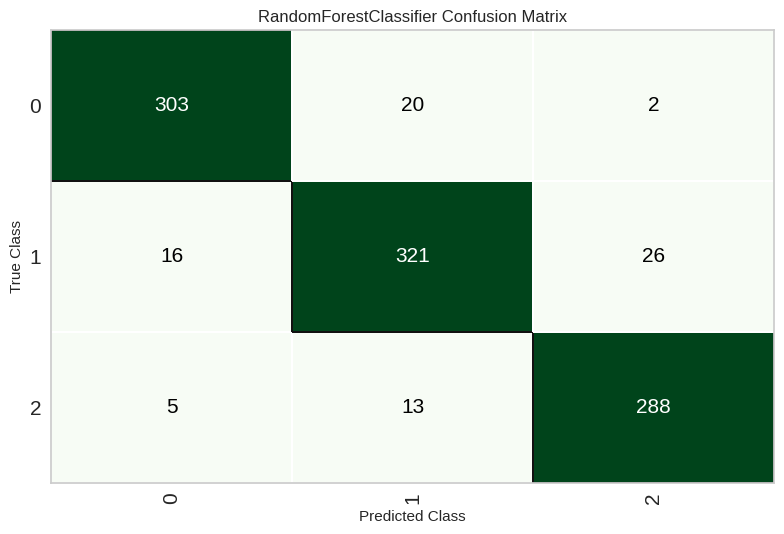

In [12]:
plot_model(rf, plot = 'confusion_matrix')

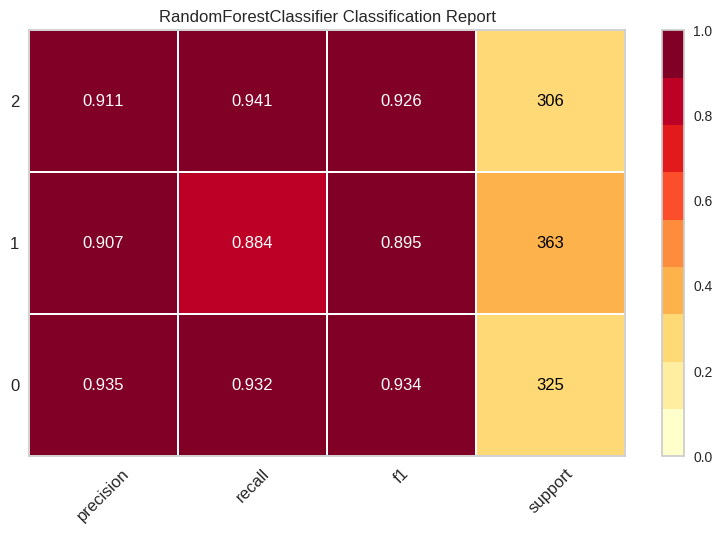

In [13]:
plot_model(rf, plot = 'class_report')

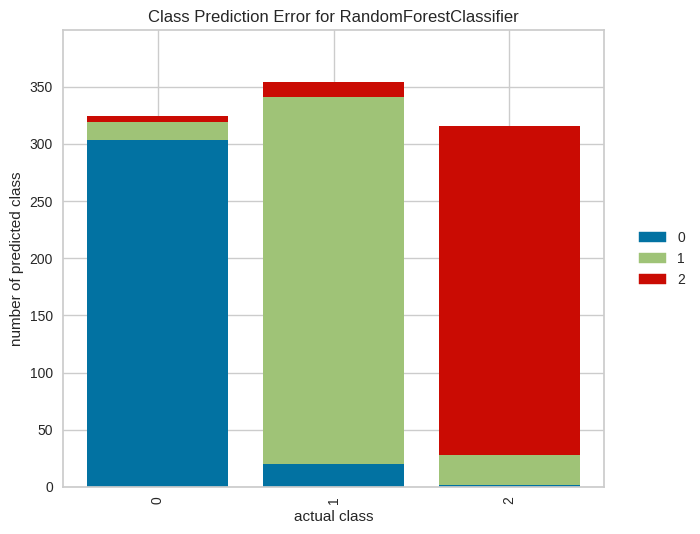

In [14]:
plot_model(rf, plot = 'error')

In [15]:
set1 = set(cnpj3)
set2 = set(cnpj4)
matches01 = list(set1.intersection(set2))
data3  = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)]
rent1M = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
data3 = data3.merge(rent1M, how='inner', on='CNPJ do fundo')
data3.dropna(axis=0, inplace=True)
                
data_unseen = data3
data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 3M', inplace=True)

In [16]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 3M'] < (data_teste['Rentabilidade 3M'].mean() - 0.5*data_teste['Rentabilidade 3M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 3M'] > (data_teste['Rentabilidade 3M'].mean() + 0.5*data_teste['Rentabilidade 3M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

# data_unseen.drop(columns='Rentabilidade 3M', inplace=True)
unseen_predictions = predict_model(rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

array([[ 78,  11,   0],
       [164,  43,   4],
       [  6,  45,  14]])

In [17]:
unseen_predictions[['Rentabilidade 3M', 'Rentabilidade 3 meses']].loc[unseen_predictions['prediction_label'] == 1]

,Rentabilidade 3M,Rentabilidade 3 meses
42,0.036756,0.033539
43,0.163303,0.025714
44,0.147031,0.195207
48,0.108473,0.149810
49,-0.021577,0.039594
52,0.105898,0.146910
74,0.060810,0.026269
78,0.143553,0.190790
85,0.000415,0.018946
94,0.066948,0.103374


In [18]:
set1 = set(cnpj4)
set2 = set(cnpj5)
matches01 = list(set1.intersection(set2))
data4  = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)]
rent1M = data0_5.loc[data0_5['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
data4 = data4.merge(rent1M, how='inner', on='CNPJ do fundo')
data4.dropna(axis=0, inplace=True)

data_unseen = data4

data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 3M', inplace=True)

In [19]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 3M'] < (data_teste['Rentabilidade 3M'].mean() - 0.5*data_teste['Rentabilidade 3M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 3M'] > (data_teste['Rentabilidade 3M'].mean() + 0.5*data_teste['Rentabilidade 3M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

data_unseen.drop(columns='Rentabilidade 3M', inplace=True)
unseen_predictions = predict_model(rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.3644,0.5037,0.3644,0.4724,0.3188,0.0876,0.1221


array([[ 86,  15,   0],
       [152,  16,   1],
       [ 40,  24,  31]])

In [20]:
unseen_predictions.loc[unseen_predictions['prediction_label'] == 1]

,CNPJ do fundo,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,...,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster,prediction_label,prediction_score
3,3919493000156,0.184861,0.075807,0.233281,0.892302,1.414284,0.230610,0.327599,0.283454,0.295077,...,1.416417,0.743662,0.325469,0.564444,0.345762,0.173856,0.073286,1,1,0.71
13,3929711000133,0.184373,0.076471,0.233488,0.892205,1.408833,0.229933,0.326358,0.282402,0.293939,...,1.421889,0.747683,0.313565,0.567088,0.346981,0.174544,0.070375,1,1,0.69
14,3904236000140,0.183760,0.074961,0.230113,0.881764,1.380689,0.229923,0.326351,0.282434,0.293974,...,1.390915,0.722554,0.307667,0.557954,0.339426,0.168678,0.069186,1,1,0.69
15,3917776000169,0.184279,0.075139,0.230876,0.884157,1.387503,0.230410,0.327013,0.283046,0.294328,...,1.394291,0.725549,0.310085,0.558932,0.340342,0.169467,0.069792,1,1,0.70
39,10292302000134,0.016760,0.163303,0.388247,0.651638,0.300506,0.624294,0.520975,0.492983,0.519572,...,-0.139115,-0.286178,-0.026384,-0.079816,-0.040017,-0.091417,-0.008101,0,1,0.46
40,10590125000172,0.029002,0.147031,0.663019,0.141335,0.809187,0.074906,0.145712,0.285932,0.319848,...,0.032841,-0.172745,-0.493852,0.213739,0.012897,-0.072821,-0.216082,1,1,0.55
42,10869628000181,0.029075,0.143553,0.649843,0.134193,0.780961,0.074688,0.142115,0.282729,0.316987,...,0.013045,-0.193967,-0.516281,0.205096,0.005132,-0.081877,-0.225784,1,1,0.56
54,3914671000156,0.183943,0.075025,0.230791,0.883474,1.390847,0.230020,0.326844,0.282707,0.293899,...,1.397335,0.728778,0.319533,0.558785,0.340850,0.170172,0.071868,1,1,0.69
60,8828888000167,0.183761,0.073635,0.227707,0.872697,1.363992,0.230509,0.327288,0.283153,0.294471,...,1.361972,0.691091,0.259549,0.548980,0.332231,0.161457,0.058424,1,1,0.71
104,2838578000147,0.180333,0.073100,0.228258,0.875544,1.356584,0.225703,0.322631,0.280422,0.292587,...,1.378682,0.718303,0.308997,0.551768,0.336651,0.167762,0.069527,1,1,0.69


In [21]:
# data_unseen

In [22]:
# unseen_predictions = predict_model(rf, data=data_unseen)
# unseen_predictions.loc[unseen_predictions['prediction_label'] == 1]


In [23]:
# unseen_predictions.iloc[data_teste.loc[data_teste['Cluster'] == 1].index]

In [24]:
# abs(unseen_predictions['prediction_label']-data_teste['Cluster']).plot(figsize=(25,5))

In [25]:
#(data['Volatilidade No mês'].loc[ data['CNPJ do fundo'] == 8336054000134 ]).plot()
# data['Volatilidade 6 meses'].loc[ data['CNPJ do fundo'] == 8336054000134 ].plot()
#data['Volatilidade 3 meses'].loc[ data['CNPJ do fundo'] == 8336054000134 ].plot()

In [26]:
# data.loc[ data['CNPJ do fundo'] == 8336054000134 ]


In [27]:
final_rf = finalize_model(rf)

In [28]:
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Rentabilidade No mês',
                                             'Rentabilidade 3 meses',
                                             'Rentabilidade 6 meses',
                                             'Rentabilidade 12 meses',
                                             'Rentabilidade 24 meses',
                                             'Volatilidade No mês',
                                             'Volatili...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_f

In [29]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9980,1.0000,0.9980,0.9980,0.9980,0.9970,0.9970


,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster,prediction_label,prediction_score
3458,-0.043209,-0.065104,0.090232,-0.014948,0.231355,0.196513,0.158438,0.158302,0.207205,0.215880,...,0.388655,0.674791,-0.095591,0.042390,0.040907,0.070081,-0.011331,0,0,0.79
1475,0.089133,0.128736,0.078584,0.070317,-0.000748,0.124772,0.161968,0.176751,0.186738,0.190072,...,0.862932,0.785573,0.465159,0.059053,0.096706,0.096489,0.097237,1,1,0.97
2125,0.047201,0.349379,0.376273,0.442113,1.600428,0.306025,0.308793,0.325411,0.388043,0.376379,...,0.736676,0.633993,0.195190,0.331689,0.175293,0.143853,0.043664,1,1,1.00
4566,-0.045555,0.108603,0.041063,0.120545,0.162802,0.108145,0.132293,0.142917,0.152978,0.172523,...,-0.072780,-0.327113,-0.082882,0.027492,-0.003432,-0.014579,-0.005445,0,0,0.99
4300,-0.103497,0.176164,-0.101293,0.292516,-0.076852,0.392344,0.471373,0.478907,0.525098,0.568819,...,-0.318323,-0.333118,-0.105285,-0.019323,-0.106999,-0.105004,-0.032164,-1,-1,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,0.113961,0.289908,0.176140,0.259189,-0.303279,0.199003,0.209154,0.233597,0.249829,0.269656,...,-0.170486,-0.129162,0.144774,-0.109730,-0.023991,-0.017124,0.021536,1,1,0.90
4803,-0.007106,-0.019717,-0.020866,0.141538,-0.117468,0.168077,0.179845,0.205240,0.199819,0.227580,...,-0.779364,-0.613350,-0.096995,-0.145969,-0.084735,-0.062756,-0.014111,-1,-1,0.94
812,-0.029254,-0.078501,-0.089874,-0.115783,0.019767,0.168388,0.250245,0.225053,0.215323,0.221639,...,-0.277390,-0.103172,0.035950,-0.096281,-0.049852,-0.018503,0.008739,-1,-1,0.83
891,0.003404,-0.002843,-0.000055,-0.201526,-0.234889,0.144529,0.132807,0.150939,0.202965,0.195785,...,0.231272,0.128551,0.119277,-0.093253,0.075543,0.044602,0.055738,0,0,0.94


In [30]:
set1 = set(cnpj3)
set2 = set(cnpj4)
matches01 = list(set1.intersection(set2))
data3  = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)]
rent1M = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
data3 = data3.merge(rent1M, how='inner', on='CNPJ do fundo')
data3.dropna(axis=0, inplace=True)
                
data_unseen = data3
data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 3M', inplace=True)

In [31]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 3M'] < (data_teste['Rentabilidade 3M'].mean() - 0.5*data_teste['Rentabilidade 3M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 3M'] > (data_teste['Rentabilidade 3M'].mean() + 0.5*data_teste['Rentabilidade 3M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

# data_unseen.drop(columns='Rentabilidade 3M', inplace=True)
unseen_predictions = predict_model(final_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

array([[ 76,  13,   0],
       [150,  57,   4],
       [  4,  49,  12]])

In [32]:
set1 = set(cnpj4)
set2 = set(cnpj5)
matches01 = list(set1.intersection(set2))
data4  = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)]
rent1M = data0_5.loc[data0_5['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 3 meses']]
rent1M['Rentabilidade 3M'] = rent1M['Rentabilidade 3 meses']
rent1M.drop(columns='Rentabilidade 3 meses', inplace=True)
data4 = data4.merge(rent1M, how='inner', on='CNPJ do fundo')
data4.dropna(axis=0, inplace=True)

data_unseen = data4

data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 3M', inplace=True)

In [33]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 3M'] < (data_teste['Rentabilidade 3M'].mean() - 0.5*data_teste['Rentabilidade 3M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 3M'] > (data_teste['Rentabilidade 3M'].mean() + 0.5*data_teste['Rentabilidade 3M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

data_unseen.drop(columns='Rentabilidade 3M', inplace=True)
unseen_predictions = predict_model(final_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.3644,0.5136,0.3644,0.4856,0.3382,0.0754,0.0971


array([[ 78,  22,   1],
       [143,  25,   1],
       [ 39,  26,  30]])

In [34]:
save_model(final_rf,'Final rf3Mtuned Model 30Jun2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Rentabilidade No mês',
                                              'Rentabilidade 3 meses',
                                              'Rentabilidade 6 meses',
                                              'Rentabilidade 12 meses',
                                              'Rentabilidade 24 meses',
                                              'Volatilidade No mês',
                                              'Volatili...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_d